In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier


import seaborn as sns
print("Setup Complete")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Setup Complete
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv') #read the train dataset
test = pd.read_csv('/kaggle/input/titanic/test.csv')     #read the test dataset
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv') #read the sample submission dataset

In [4]:
# Read the first five data from the training datset.
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Read the first five data from the test datset.
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
submission.head() #read the first five data from the submission dataset.

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
#Merge or combine the training and test dataset using concatenation.
combine_dataset = pd.concat([train,test])
#shows the first five data from test and train data.
combine_dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Shows the statistical information of training and test dataset.
combine_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
combine_dataset.info() # get the information of both dataset.

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
# calculates the total number of missing value in the dataset.
combine_dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Text(0.5, 1.0, 'The percentage of Survival')

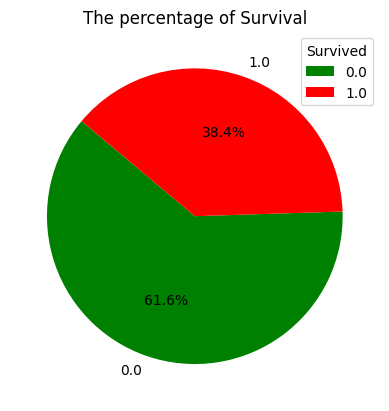

In [11]:
#Pie Chart - Visualizing the perecentage of survived patients.

# Count the number of occurrences for each category in the 'Survival_Status' column
survival = combine_dataset['Survived'].value_counts()
# Colors for each section
colors = ['green', 'red']
# plotting the pie chart
plt.pie(survival, labels=survival.index, colors=colors, autopct="%1.1f%%", startangle=140)

plt.legend(title='Survived')
#Title of the pie chart
plt.title('The percentage of Survival')

The pie chart shows that 38.4% was the survival rate.

**Cleaning the data**

*Feature 1: NAME*

In [12]:
# We start cleaning the data from name column. 

#get the examples of name column
combine_dataset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [13]:
#Extract titles using string splitting and regular expressions
combine_dataset['Title'] = combine_dataset['Name'].str.extract(' ([A-Za-z]+)\.')

# Display unique titles to understand the variety
print(combine_dataset['Title'].unique())



['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']


In [14]:
# Find the total number of value in each title.

combine_dataset['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

Since, there are some titles like Don, Lady, Dona, etc. having small number of values so, we group them together. 



In [15]:
#here cross tabulation table shows the distribution of survival status for each title.
#.T at the end transposes the table, swapping rows and columns, which can make it easier to read.
pd.crosstab(combine_dataset['Title'],combine_dataset['Survived']).T

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [16]:
## Group the 'Title' values
#Note: "Mlle" is equivalent to miss(unmarried women),
#"MMe" is equivalent to madam or mrs
#"rev" is clergy members or held a religious title, 
#"the countess" title would imply that the person held a noble or aristocratic status, 
#title "Jonkheer" indicate a person with a specific social and hereditary status
#title "Dona" is generally used for older or more respected women.
#"Don" is a title used before a man's first name usually refers to older or respected men.

combine_dataset['Title'] = combine_dataset['Title'].replace(['Miss','Ms', 'Mlle'], 'Miss')
combine_dataset['Title'] = combine_dataset['Title'].replace(['Mrs', 'Mme'], 'Mrs')
combine_dataset['Title'] = combine_dataset['Title'].replace(['Capt','Col', 'Major','Dr', 'Rev'], 'Officer')
combine_dataset['Title'] = combine_dataset['Title'].replace(['Sir','Lady','the Countess','Jonkheer','Dona','Don'], 'Royalty')


In [17]:
# Find the total number of value after grouping

combine_dataset['Title'].value_counts()

Title
Mr          757
Miss        264
Mrs         198
Master       61
Officer      23
Royalty       5
Countess      1
Name: count, dtype: int64

In [18]:
# Find the total number of Survived group by Title

combine_dataset.groupby(['Title','Survived'])['Title'].value_counts()


Title     Survived
Countess  1.0           1
Master    0.0          17
          1.0          23
Miss      0.0          55
          1.0         130
Mr        0.0         436
          1.0          81
Mrs       0.0          26
          1.0         100
Officer   0.0          13
          1.0           5
Royalty   0.0           2
          1.0           2
Name: count, dtype: int64

In [19]:
#use crosstab function

pd.crosstab(combine_dataset['Title'],combine_dataset['Survived']).T

Title,Countess,Master,Miss,Mr,Mrs,Officer,Royalty
Survived,,,,,,,
0.0,0,17,55,436,26,13,2
1.0,1,23,130,81,100,5,2


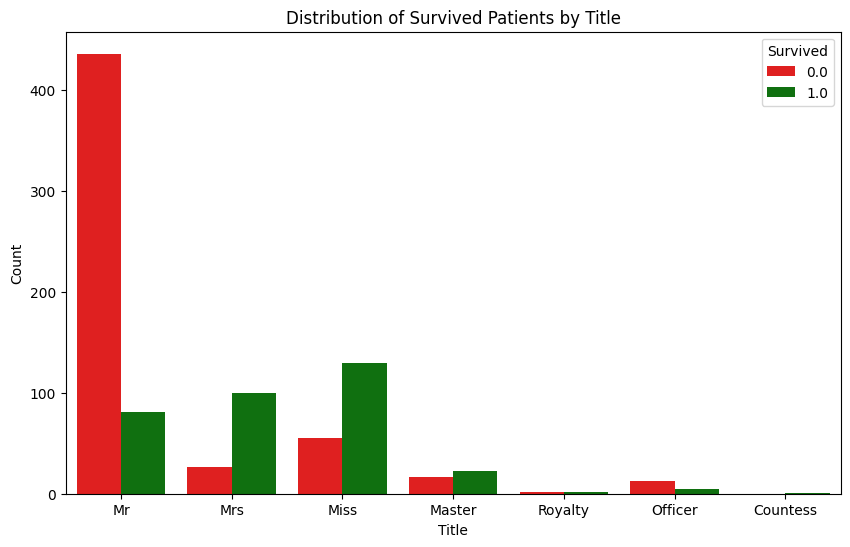

In [20]:
#Bar Chart for the distribution of Survived patients by title.
# Set the width and height of the figure
plt.figure(figsize=(10, 6))

# Add title
plt.title("Distribution of Survived Patients by Title")

# Define a custom color palette 
colors = ['red', 'green']

#shows error for sns. barplot because we have missing values in survived column, thus I used sns.countplot instead of sns.barplot
# Countplot showing the distribution of survived and not survived patients for each title
sns.countplot(x='Title', hue='Survived', data=combine_dataset, palette=colors)


# Add label for vertical axis
plt.ylabel("Count")

# Show the plot
plt.show()

Title Mrs,Miss have comparatively higher chance of survival than any other Title.Thus, we can say that Women and Children have higher chance of survival rate as compared to master, mr, royalty, officer, and Countess.

*Feature 2: SEX*

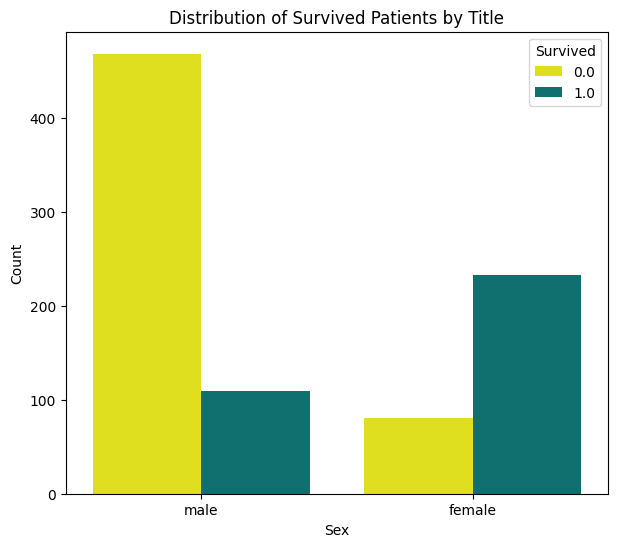

In [21]:
# Set the width and height of the figure
plt.figure(figsize=(7, 6))

# Add title
plt.title("Distribution of Survived Patients by Title")

# Define a custom color palette 
colors = ['yellow', 'teal']

#shows error for sns. barplot because we have missing values in survived column, thus I used sns.countplot instead of sns.barplot
# Countplot showing the distribution of survived and not survived patients for each title
sns.countplot(x='Sex', hue='Survived', data=combine_dataset, palette=colors)


# Add label for vertical axis
plt.ylabel("Count")

# Show the plot
plt.show()

Female have higher chance of surviving than male.

*Feature 3: Embarked*

In [22]:
# Display the number of missing values in the 'Embarked' column before imputation
print("Before imputation:")
print(combine_dataset['Embarked'].isnull().sum())



Before imputation:
2


In [23]:
## Extract the 2 rows of missing value 

combine_dataset[combine_dataset['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [24]:
#Data Imputation-Mode
# Calculate the mode of the 'Embarked' column
mode_value = combine_dataset['Embarked'].mode()[0]

# Fill missing values in the 'Embarked' column with the mode
combine_dataset['Embarked'].fillna(mode_value, inplace=True)

# Display the number of missing values in the 'Embarked' column after imputation
print("After imputation:")
print(combine_dataset['Embarked'].isnull().sum())

After imputation:
0


/tmp/ipykernel_33/2757616811.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combine_dataset['Embarked'].fillna(mode_value, inplace=True)


In [25]:
# Total number of Survived group by Embarked

combine_dataset.groupby(['Embarked','Survived'])['Survived'].value_counts()

Embarked  Survived
C         0.0          75
          1.0          93
Q         0.0          47
          1.0          30
S         0.0         427
          1.0         219
Name: count, dtype: int64

In [26]:
#use crosstab function

pd.crosstab(combine_dataset['Embarked'],combine_dataset['Survived']).T

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,219


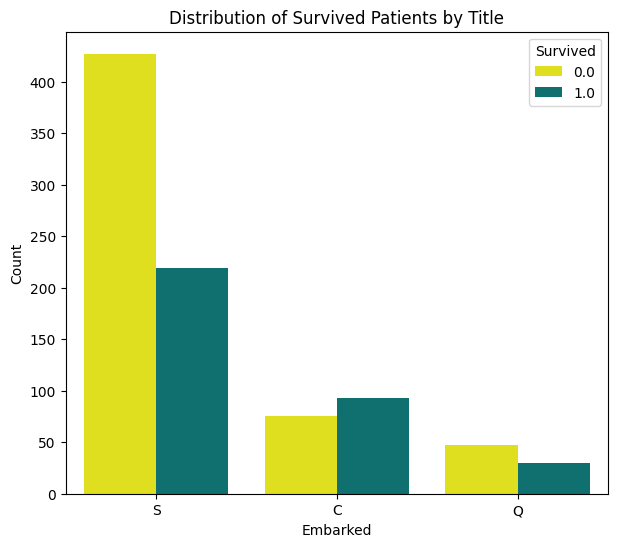

In [27]:
#Barchart for the Distribution of Survived Patients by Embarked.
#C: Cherbourg
#Q: Queenstown (now known as Cobh)
#S: Southampton
# Set the width and height of the figure
plt.figure(figsize=(7, 6))

# Add title
plt.title("Distribution of Survived Patients by Title")

# Define a custom color palette 
colors = ['yellow', 'teal']

#shows error for sns. barplot because we have missing values in survived column, thus I used sns.countplot instead of sns.barplot
# Countplot showing the distribution of survived and not survived patients for each title
sns.countplot(x='Embarked', hue='Survived', data=combine_dataset, palette=colors)


# Add label for vertical axis
plt.ylabel("Count")

# Show the plot
plt.show()


The embarked 'Q' has the lowest survival rate whreas the embarked 'S' has the highest survival rate among three embarkation points. But at the same time, Embarked 'S' have a higher chance to dead. 


*Feature 4: AGE*

In [28]:
# Display the number of missing values in the 'Embarked' column before imputation
print("Before imputation:")
print(combine_dataset['Age'].isnull().sum())


Before imputation:
263


In [29]:
# Percentage of the missing values of 'Age' column

(combine_dataset['Age'].isnull().sum() / len(combine_dataset) *100).round(2)

20.09

Since, the perecentage of missing values is 20.09 so, simply filling the missing values with mean, median,or mode will work here.
All new values will affect the 20% of age column.


In [30]:
# # Find the mean values of 'Age' group by 'Title'
mean_age_by_title = combine_dataset.groupby('Title')['Age'].mean()

# Display the result
print(mean_age_by_title)


Title
Countess    33.000000
Master       5.482642
Miss        21.824366
Mr          32.252151
Mrs         36.918129
Officer     46.272727
Royalty     42.800000
Name: Age, dtype: float64


If the missing values of 'Age' that have
Title = Countess, I will fill with Age mean = 33.00000

Title = Master, I will fill with Age mean = 5.482642 and so on.



In [31]:
# combine_dataset is your DataFrame and 'Age' is the column with missing values
#Filling the missing values of Age with mean values group by Title.
mean_age = combine_dataset['Age'].mean()
combine_dataset['Age'].fillna(mean_age, inplace=True)

/tmp/ipykernel_33/2208808533.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combine_dataset['Age'].fillna(mean_age, inplace=True)


In [33]:
# Display the number of missing values in the 'Age' column after imputation
print("After imputation:")
print(combine_dataset['Age'].isnull().sum())

After imputation:
0


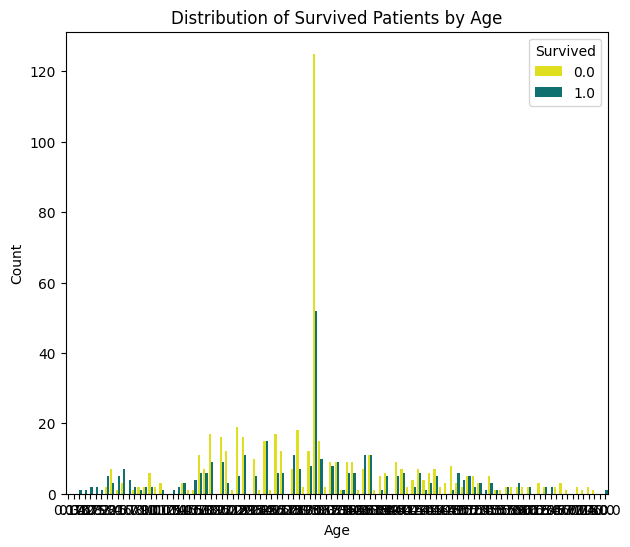

In [34]:
plt.figure(figsize=(7, 6))

# Add title
plt.title("Distribution of Survived Patients by Age")

# Define a custom color palette 
colors = ['yellow', 'teal']

#shows error for sns. barplot because we have missing values in survived column, thus I used sns.countplot instead of sns.barplot
# Countplot showing the distribution of survived and not survived patients for each title
sns.countplot(x='Age', hue='Survived', data=combine_dataset, palette=colors)


# Add label for vertical axis
plt.ylabel("Count")

# Show the plot
plt.show()

Since, Age is a continuous data so, I'm converting it into categorical data by grouping.



In [35]:
# Creating a Categorical variable for Ages

combine_dataset['AgeGroup'] = ''
combine_dataset['AgeGroup'].loc[(combine_dataset['Age'] < 18)] = 'Young'
combine_dataset['AgeGroup'].loc[(combine_dataset['Age'] >= 18) & (combine_dataset['Age'] < 40)] = 'Adult'
combine_dataset['AgeGroup'].loc[(combine_dataset['Age'] >= 40) & (combine_dataset['Age'] < 56)] = 'Middle age'
combine_dataset['AgeGroup'].loc[(combine_dataset['Age'] >= 56)] = 'Senior'


/tmp/ipykernel_33/1649591593.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  combine_dataset['AgeGroup'].loc[(combine_dataset['Age'] < 18)] = 'Young'
/tmp/ipykernel_33/1649591593.py:4: SettingWithCopyWarning: 
A value is trying to be set

In [36]:
# Find the total number of Survived group by Age

pd.crosstab(combine_dataset['AgeGroup'], combine_dataset['Survived']).T

AgeGroup,Adult,Middle age,Senior,Young
Survived,,,,
0.0,395,75,27,52
1.0,220,49,12,61


In [106]:
# Change the label of Age Bin

label = LabelEncoder()

combine_dataset['AgeGroup'] = label.fit_transform(combine_dataset['AgeGroup'])


In [108]:
# Check the table again

pd.crosstab(combine_dataset['AgeGroup'], combine_dataset['Survived']).T

AgeGroup,0,1,2,3
Survived,,,,
0.0,395,75,27,52
1.0,220,49,12,61


Text(0.5, 1.0, 'Distribution of Survived by AgeGroup')

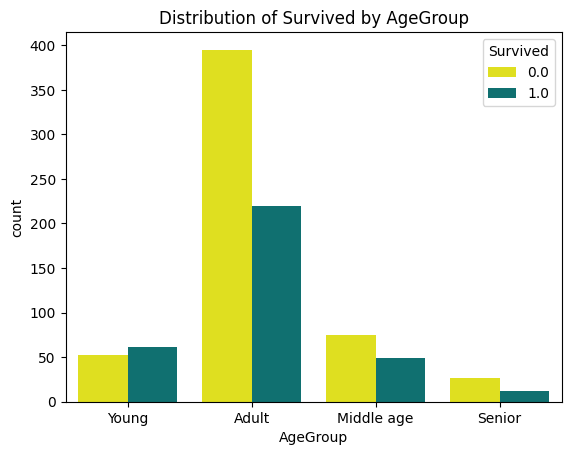

In [37]:
# Create a bar chart for the Distribution of Survived by 'Age Group' 

order = ['Young','Adult','Middle age', 'Senior']
colors = ['yellow', 'teal']

sns.countplot(x=combine_dataset['AgeGroup'], hue='Survived', data=combine_dataset, order=order, palette=colors)

plt.title('Distribution of Survived by AgeGroup')

We can see that Adult has higher chance of death risk as compared to other age group.

*Feature 5: CABIN*

In [38]:
# Find the total number of missing value of 'Cabin' column

combine_dataset['Cabin'].isnull().sum()

1014

In [39]:
# Percentage of the missing values of 'Cabin' column

(combine_dataset['Cabin'].isnull().sum() / len(combine_dataset) *100).round(2)

77.46

77.46% of the data are missing from the Cabin column, thus we will not use the cabin column since it will effect the accuracy of the prediction.



*FEATURE 6: FARE*

In [40]:
# Check the missing value of 'Fare' column

combine_dataset['Fare'].isnull().sum()

1

In [41]:
# Get the 1 row of missing value 

combine_dataset[combine_dataset['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,Senior


In [42]:
# Fill missing fare with median

combine_dataset['Fare'].fillna(combine_dataset['Fare'].median(), inplace = True)

/tmp/ipykernel_33/169522745.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combine_dataset['Fare'].fillna(combine_dataset['Fare'].median(), inplace = True)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Fare', ylabel='Count'>

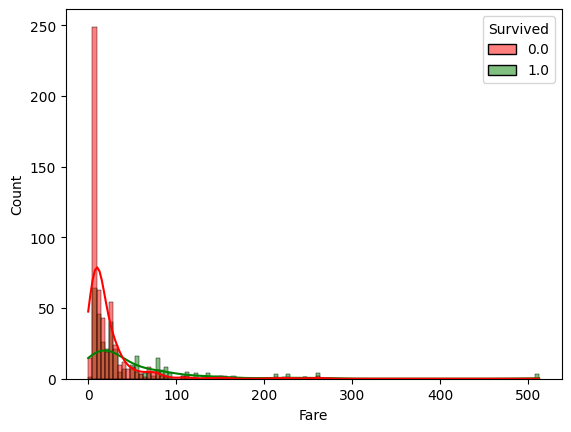

In [43]:
# Create a histogram of Fare
custom_palette = {0: 'red', 1: 'green'} 
sns.histplot(data = combine_dataset, x = 'Fare', hue = 'Survived', kde = True, palette=custom_palette)

Since fare column is a continuous data so, we will use pandas.qcut to convert the 'Fare' column into ordinal values by creating 5 bins with equally spaced quantiles.

In [44]:
# Specify the number of bins
num_bins = 5

# Use qcut to create 5 bins
combine_dataset['FareGroup'] = pd.qcut(combine_dataset['Fare'], q=num_bins, labels=False)

# Display the result
print(combine_dataset[['Fare', 'FareGroup']].head())

      Fare  FareGroup
0   7.2500          0
1  71.2833          4
2   7.9250          1
3  53.1000          4
4   8.0500          1


In [45]:
# Total number of Survived group by Fare Group

pd.crosstab(combine_dataset['FareGroup'], combine_dataset['Survived']).T

FareGroup,0,1,2,3,4
Survived,,,,,
0.0,140,147,98,103,61
1.0,39,37,73,82,111


Text(0.5, 1.0, 'Distribution of Survived by FareGroup')

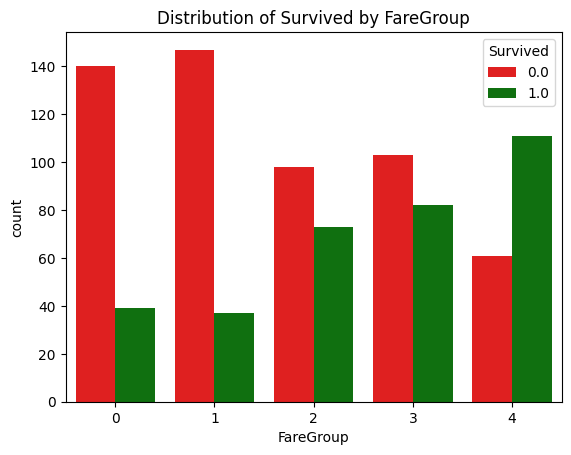

In [46]:
# Create a bar chart for the Distribution of Survived by 'FareBin' 
custom_palette = {0: 'red', 1: 'green'} 
sns.countplot(x=combine_dataset['FareGroup'], hue='Survived', data=combine_dataset, palette=custom_palette )

plt.title('Distribution of Survived by FareGroup')

*Feature 7: PCLASS*

Text(0.5, 1.0, 'Distribution of Survived by Ticket class')

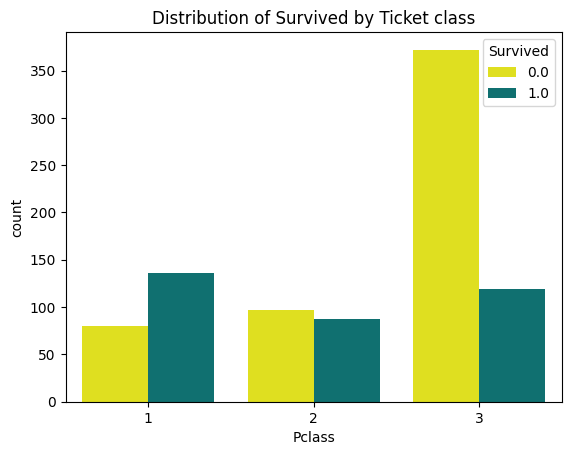

In [47]:
# Create a bar chart for the Distribution of Survived by 'Pclass' (Ticket class) 
colors = ['yellow', 'teal']
sns.countplot(x=combine_dataset['Pclass'], hue='Survived', data=combine_dataset, palette=colors)

plt.title('Distribution of Survived by Ticket class')

In [48]:
# Check the correlation between Pclass and Title

pd.crosstab(combine_dataset['Pclass'], combine_dataset['Title'])

Title,Countess,Master,Miss,Mr,Mrs,Officer,Royalty
Pclass,,,,,,,
1,1,5,62,159,78,13,5
2,0,11,51,150,55,10,0
3,0,45,151,448,65,0,0


All of the Royalty were in Ticket class 1.

Most of Children were in Ticket class 3.

Text(0.5, 1.0, 'Distribution of Pclass by Title')

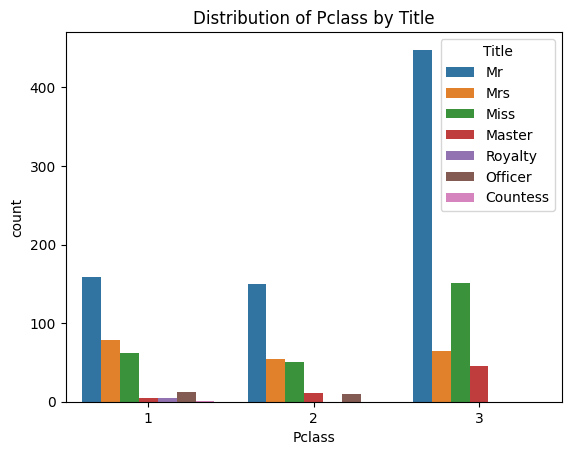

In [49]:
# Create a bar chart between Pclass and Title

sns.countplot(x=combine_dataset['Pclass'], hue='Title', data=combine_dataset)

plt.title('Distribution of Pclass by Title')

In [50]:
# Check the correlation between Pclass and Sex

pd.crosstab(combine_dataset['Pclass'], combine_dataset['Sex'])

Sex,female,male
Pclass,,
1,144,179
2,106,171
3,216,493


Text(0.5, 1.0, 'Distribution of Pclass by Sex')

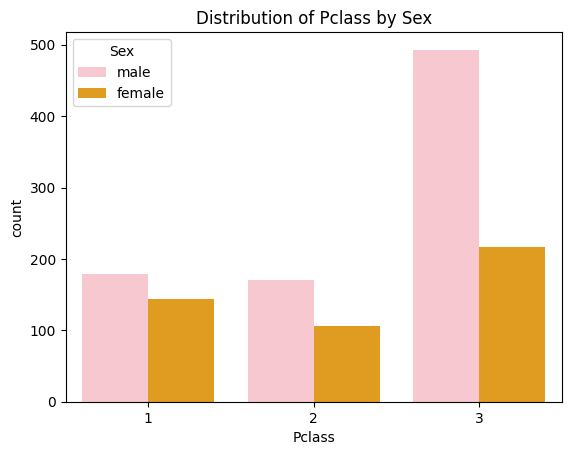

In [51]:
# Create a bar chart between Pclass and Title
colors = ['pink', 'orange']
sns.countplot(x=combine_dataset['Pclass'], hue='Sex', data=combine_dataset, palette=colors)

plt.title('Distribution of Pclass by Sex')

*Feature 8: PARCH, and FEATURE 9: SIBSP*

In [ ]:
# Create jointplot between 'Parent/Childern(ParCh)' and 'Siblings/Spouses(SibSp)'

sns.jointplot(x='Parch',y='SibSp',data=combine_dataset,color='green')

In [53]:
# Create 'Family size' column by combine 'ParCh' and 'SibSp' and plus 1 is yourself

combine_dataset['FamilySize'] = combine_dataset['Parch'] + combine_dataset['SibSp'] + 1

combine_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FareGroup,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult,0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult,4,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult,4,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult,1,1


In [54]:
# Total number of Survived group by Family Size 

pd.crosstab(combine_dataset['FamilySize'],combine_dataset['Survived']).T

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0.0,374,72,43,8,12,19,8,6,7
1.0,163,89,59,21,3,3,4,0,0


Text(0.5, 1.0, 'Distribution of Survived by Family Size')

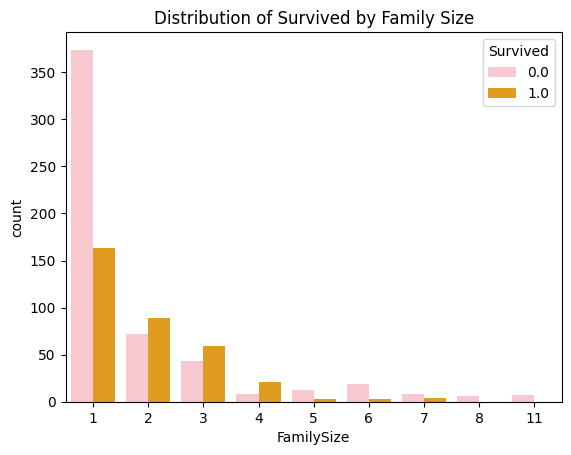

In [55]:
# Create a bar chart for the Distribution of Survived by 'Family Size' 
colors = ['pink', 'orange']
sns.countplot(x=combine_dataset['FamilySize'], hue='Survived', data=combine_dataset, palette=colors)

plt.title('Distribution of Survived by Family Size')

In [56]:
# Create a group of family

family_map = {1: 'Alone', 
              2: 'Small', 
              3: 'Small', 
              4: 'Small', 
              5: 'Medium', 
              6: 'Medium', 
              7: 'Large', 
              8: 'Large', 
              11: 'Large'}

combine_dataset['FamilySizeGroup'] = combine_dataset['FamilySize'].map(family_map)

combine_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FareGroup,FamilySize,FamilySizeGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult,0,2,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult,4,2,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult,1,1,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult,4,2,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult,1,1,Alone


Text(0.5, 1.0, 'Distribution of Survived by Family Size Group')

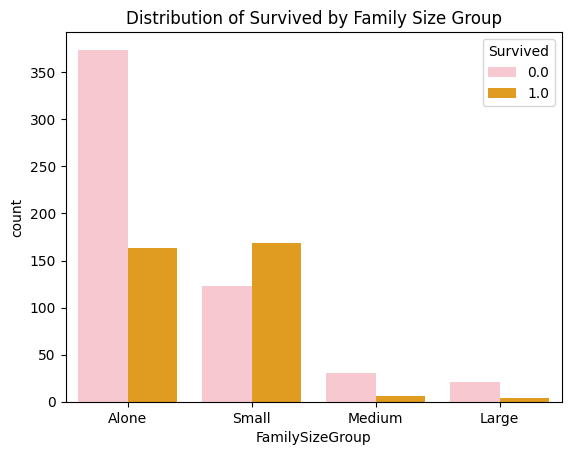

In [57]:
# Create a bar chart for the Distribution of Survived by 'FamilySizeGroup' 
colors = ['pink', 'orange']
order=['Alone','Small','Medium','Large']

sns.countplot(x=combine_dataset['FamilySizeGroup'], hue='Survived', data=combine_dataset, order=order, palette=colors)

plt.title('Distribution of Survived by Family Size Group')

The bar chart indicates that a person who was alone in the titanic shipwreck has a higher chance of death.

*Feature 10: Ticket*

In [58]:
# Get the example of 'Ticket' column

combine_dataset['Ticket']

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1309, dtype: object

In [59]:
combine_dataset['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

Out of 1309 tickets, only 929 tickets were unique. Does it mean they are from the same family? 

In [60]:
# Create 'LastName' column from 'Name' column

combine_dataset['LastName']= combine_dataset['Name'].str.split(',').str[0]

In [61]:
# Find the total number of value in each Last Name

combine_dataset['LastName'].value_counts()

LastName
Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: count, Length: 875, dtype: int64

In [62]:
combine_dataset['LastName'].describe()

count          1309
unique          875
top       Andersson
freq             11
Name: LastName, dtype: object

In [63]:
#Find the duplicate ticket.
duplicate_ticket = combine_dataset[combine_dataset.duplicated(subset='Ticket', keep=False)]
duplicate_ticket = duplicate_ticket.groupby('Ticket').apply(lambda group: group[['Ticket', 'LastName', 'Fare', 'FamilySize', 'Survived']])
duplicate_ticket.head(15)

/tmp/ipykernel_33/3244735059.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicate_ticket = duplicate_ticket.groupby('Ticket').apply(lambda group: group[['Ticket', 'LastName', 'Fare', 'FamilySize', 'Survived']])


Ticket  LastName     Fare  FamilySize  Survived
Ticket                                                     
110152 257  110152    Cherry  86.5000           1       1.0
       504  110152    Maioni  86.5000           1       1.0
       759  110152    Rothes  86.5000           1       1.0
110413 262  110413   Taussig  79.6500           3       0.0
       558  110413   Taussig  79.6500           3       1.0
       585  110413   Taussig  79.6500           3       1.0
110465 110  110465    Porter  52.0000           1       0.0
       475  110465  Clifford  52.0000           1       0.0
110813 366  110813    Warren  75.2500           2       1.0
       236  110813    Warren  75.2500           2       NaN
111361 329  111361   Hippach  57.9792           2       1.0
       523  111361   Hippach  57.9792           2       1.0
112058 815  112058       Fry   0.0000           1       0.0
       372  112058     Ismay   0.0000           1       NaN
112378 368  112378    Gibson  59.4000           2       NaN

For Ticket '110413', they were all in Taussig family and among three, two were able to survive from the disaster.

For Ticket'111361', they were all in Hippach family and their family member were all survivied.

For Ticket '110152', they were not in the same family, may be they were friends?

There's a high relationship for people who had same ticket to survivied. It also gives us the idea that a person who is alone has higher risk of death as compared to a person who is in a group.

In [110]:
# Check the column name

combine_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'AgeGroup',
       'FareGroup', 'FamilySize', 'FamilySizeGroup', 'LastName'],
      dtype='object')

In [116]:
# Select only useful columns
# (also can use drop unnecessory columns)
# (You can try to change the feature selection and see the different results)

useful_columns = ['Survived', 
                  'Pclass', 
                  'AgeGroup', 
                  'FareGroup',
                  'Sex', 
                  'FamilySize' ]

data = combine_dataset[useful_columns]

data.head()

,Survived,Pclass,AgeGroup,FareGroup,Sex,FamilySize
0,0.0,3,0,0,male,2
1,1.0,1,0,4,female,2
2,1.0,3,0,1,female,1
3,1.0,1,0,4,female,2
4,0.0,3,0,1,male,1


In [117]:
# Create dummy variables from categories 
# (also can use One Hot Encoder)

final = pd.get_dummies(data)

final.head()

,Survived,Pclass,AgeGroup,FareGroup,FamilySize,Sex_female,Sex_male
0,0.0,3,0,0,2,False,True
1,1.0,1,0,4,2,True,False
2,1.0,3,0,1,1,True,False
3,1.0,1,0,4,2,True,False
4,0.0,3,0,1,1,False,True


**Building the model**

In [118]:
# Splits to train and test dataset.
# Reform splits to train, test dataset

df_train = final[:len(train)]
df_test = final[len(train):]

df_test.drop('Survived', axis=1, inplace=True)

In [86]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 


# Models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [119]:
# Select X : Features

X = df_train.drop('Survived', axis=1)

# Select y : Target Variable

y = df_train['Survived']
df_train.head()

,Survived,Pclass,AgeGroup,FareGroup,FamilySize,Sex_female,Sex_male
0,0.0,3,0,0,2,False,True
1,1.0,1,0,4,2,True,False
2,1.0,3,0,1,1,True,False
3,1.0,1,0,4,2,True,False
4,0.0,3,0,1,1,False,True


In [120]:
rf = RandomForestClassifier(random_state=0) 

rf.fit(X,y)

rf_cv = cross_val_score(rf,X,y, cv = 10,scoring = 'accuracy').mean()
rf_cv

0.8137453183520599

Text(0.5, 1.0, 'Feature Importances')

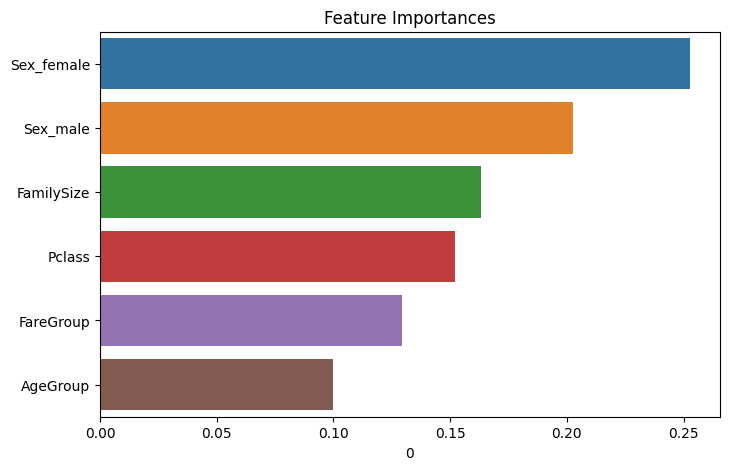

In [121]:
# Feature Importances

importances = pd.DataFrame(rf.feature_importances_,index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(8, 5)) 
sns.barplot(x=0, y=importances.index, data=importances).set_title('Feature Importances')

In [124]:
# Comparison of different models and it's performance with different parameters.
classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest','SVC','XGB','GradientB','AdaB','ExtraTrees']

models=[LogisticRegression(),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        GaussianNB(),
        RandomForestClassifier(),
        SVC(),
        XGBClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier()]

cv_mean = []
cv_std = []

for model in models:
    model=model
    cv = cross_val_score(model,X,y,cv=10)
    cv_std.append(cv.std())
    cv_mean.append(cv.mean())

cv_dataframe = pd.DataFrame({'CV Mean':cv_mean,'Std':cv_std},index=classifiers)       
cv_dataframe=cv_dataframe.sort_values(by=['CV Mean'], ascending = False)
cv_dataframe

,CV Mean,Std
SVC,0.824919,0.026657
GradientB,0.818215,0.036315
XGB,0.817116,0.045496
Random Forest,0.810375,0.039412
ExtraTrees,0.809263,0.042875
Decision Tree,0.807054,0.055198
KNN,0.806991,0.037333
AdaB,0.794607,0.015181
Naive Bayes,0.790162,0.028545
Logistic Regression,0.781161,0.029267


**Hyperparameter Tuning**

In [138]:
# Support Vector Classifier

parameters = {'kernel': ['rbf'], 
              'gamma': [0.01,0.02,0.05,0.1,0.5],
              'C': [0.1, 0.5,1,2,3,4,5,6,7,8]},

svc_tune = GridSearchCV(SVC(probability=True), 
                         param_grid=parameters, 
                         cv=10) 

svc_tune.fit(X,y)

svc_model = svc_tune.best_estimator_

print(svc_tune.best_score_)
print(svc_tune.best_params_)
print(svc_tune.best_estimator_)

0.8249188514357053
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1, probability=True)


In [142]:
# Try to submission by using support vector classifier.

# Make predictions on the test dataset
rf_predict = svc_model.predict(df_test).astype(int)

# Create a submission file
rf_output = pd.DataFrame({'PassengerId': test['PassengerId'],
                      'Survived': rf_predict})
rf_output.to_csv('submission_svc.csv', index=False)
rf_output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
